<a href="https://colab.research.google.com/github/estelaestgn/OpenCV_Segmentacao_Imagens/blob/main/SegmentacaoCores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# importação de bibliotecas
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys

# se o colab for aberto, vai baixar o modulo de imagens
if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/grass.jpg".split()
    )
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/hsv_th.png".split()
    )

In [11]:
# definição de tamanho da imagem
figsize = (10, 10)

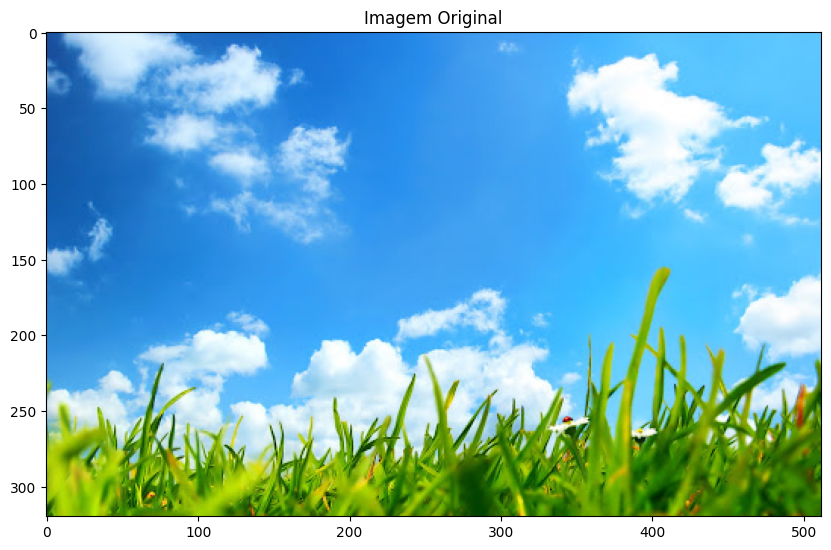

In [12]:
# lendo e guardando a imagem contida no link acima
bgr_img = cv.imread("grass.jpg")
# convertendo a imagem para RGB
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)

# plotando a imagem
plt.figure(figsize=figsize)
plt.imshow(rgb_img)
plt.title("Imagem Original")
plt.show()

In [14]:
# lendo a imagem na cor verde
rgb_green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(rgb_green, cv.COLOR_RGB2HSV)
print(hsv_green)

[[[ 60 255 255]]]


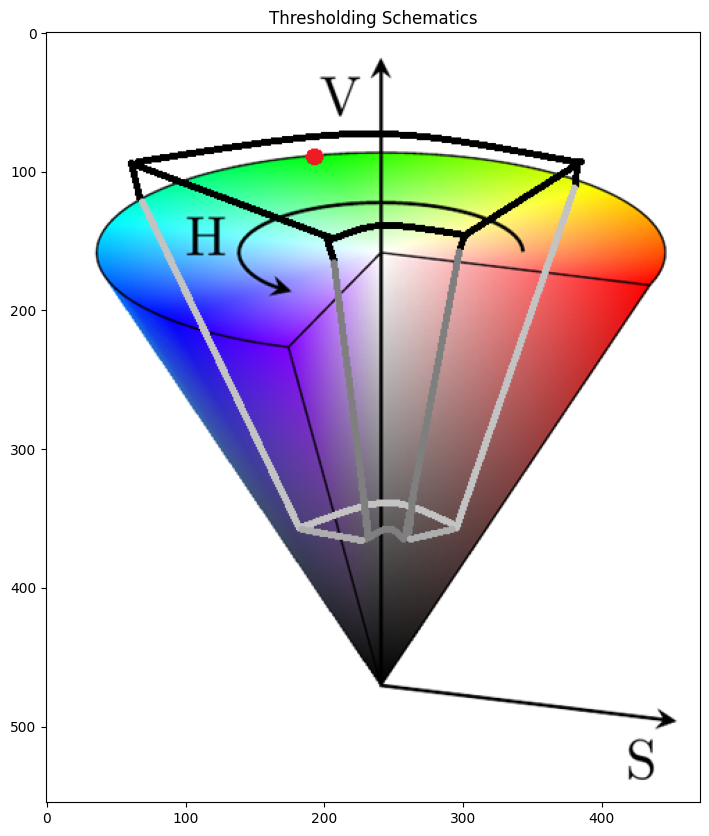

In [17]:
# imagem base de cores para definir um limiar
thresholding_schematics = cv.cvtColor(cv.imread("hsv_th.png"), cv.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(thresholding_schematics)
plt.title("Thresholding Schematics")
plt.show()

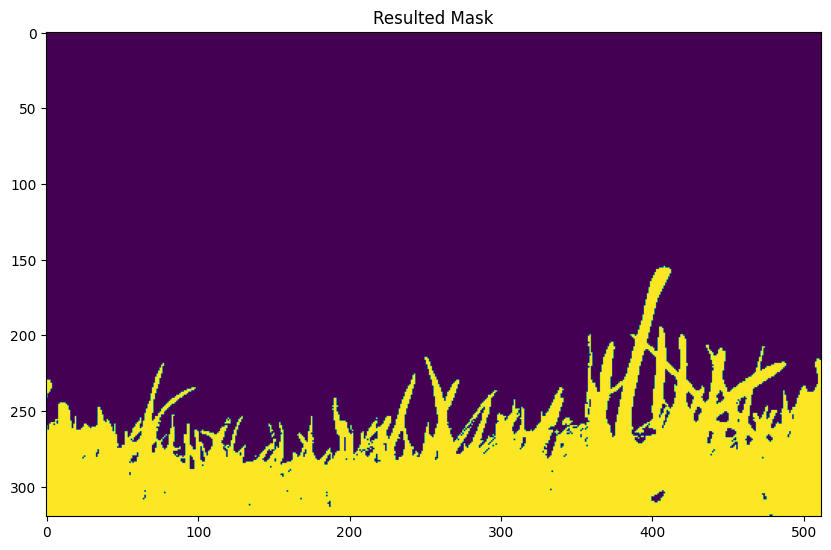

In [18]:
# convertendo a imagem RGB para HSV
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)

# definindo um limiar de hue e intensidade das cores
lower_th = hsv_green - np.array([70, 200, 200])
upper_th = hsv_green + np.array([30, 0, 0])

# aplicando os limiares na imagem hsv_img
mask = cv.inRange(hsv_img, lower_th, upper_th)

plt.figure(figsize=figsize)
plt.imshow(mask)
plt.title("Resulted Mask")
plt.show()

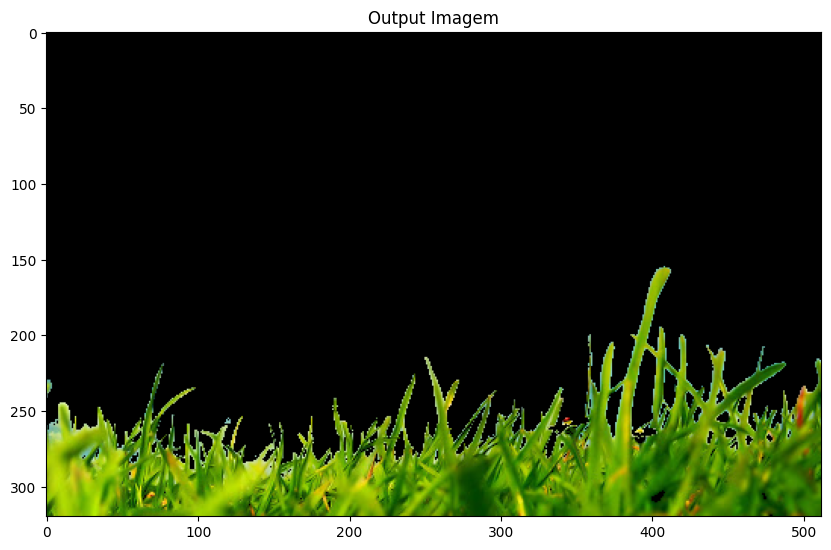

In [19]:
# eliminando o fundo com a máscara
rgb_res = cv.bitwise_and(rgb_img, rgb_img, mask=mask)

plt.figure(figsize=figsize)
plt.imshow(rgb_res)
plt.title("Output Imagem")
plt.show()